# Imports

In [86]:
import os
from PIL import Image
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Data Initialization

In [87]:
unsupervised_paths = ["Images/Tennis/SWING/"]
files = list()
images = list()


for paths in unsupervised_paths:
    for path in os.listdir(paths):
        #if len(images)<10:
        with Image.open(paths+path) as img:
            img = img.convert("RGB")
            img = img.resize((128,128))
            images.append(np.array(img).flatten())
            files.append(path)

X = np.array(images)



# PCA

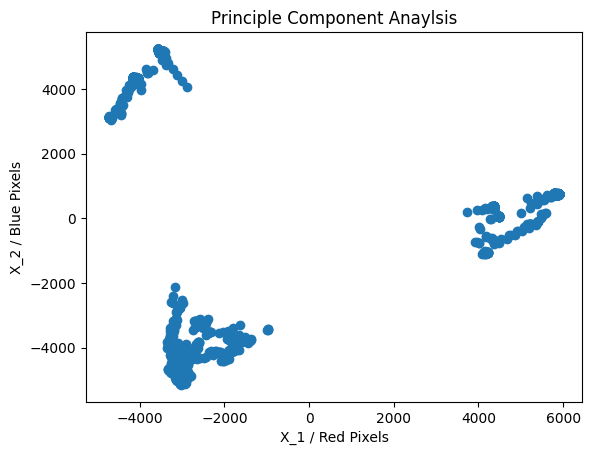

In [92]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)


plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel("X_1 / Red Pixels")
plt.ylabel('X_2 / Blue Pixels')
plt.title("Principle Component Anaylsis")
plt.show()

# K Means

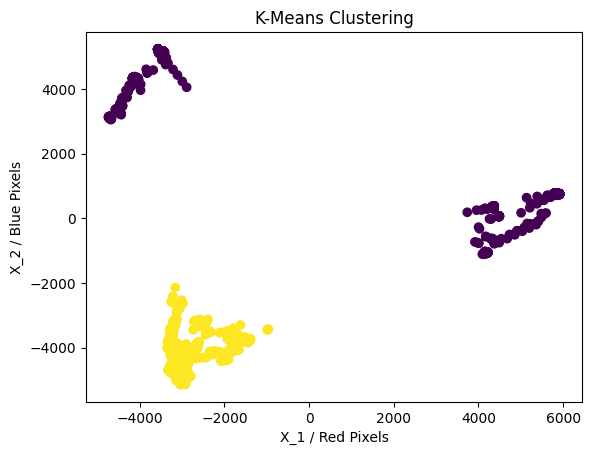

In [93]:
kmeans = KMeans(n_clusters=2, random_state=69)
labels = kmeans.fit_predict(X)

plt.scatter(X_pca[:,0], X_pca[:,1],c=kmeans.labels_.astype(float), cmap='viridis')
plt.xlabel("X_1 / Red Pixels")
plt.ylabel('X_2 / Blue Pixels')
plt.title("K-Means Clustering")
plt.show()

# DBSCAN

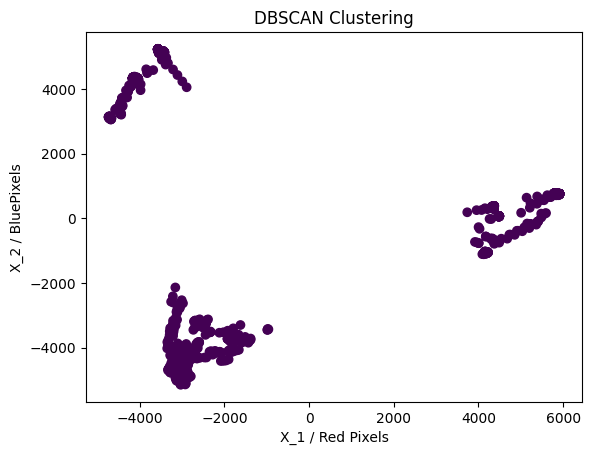

In [96]:
dbs = DBSCAN(eps=2, min_samples=2).fit(X)

plt.scatter(X_pca[:,0], X_pca[:,1],c=dbs.labels_.astype(float), cmap='viridis')
plt.xlabel('X_1 / Red Pixels')
plt.ylabel('X_2 / BluePixels')
plt.title("DBSCAN Clustering")
plt.show()

# Voronoi

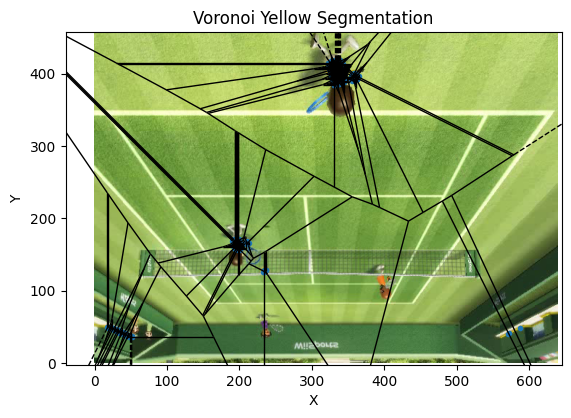

In [97]:
# Voronoi Image
with Image.open('Images/Tennis/SWING/15194_action.png') as img:
    vor_points = np.array(img)
    red = vor_points[:, :, 0]
    green = vor_points[:, :, 1]
    blue = vor_points[:, :, 2]
    yellow_mask = (red > 230) & (green > 180) & (blue < 100)
    yellow_points = np.column_stack(np.nonzero(yellow_mask)) 
    yellow_vor_points = yellow_points[:, ::-1]
    

yellow_vorononoi = Voronoi(yellow_vor_points)
fig = voronoi_plot_2d(yellow_vorononoi, show_vertices=False)
plt.imshow(img)
plt.xlabel("X")
plt.ylabel('Y')
plt.title("Voronoi Yellow Segmentation")
plt.show()
